In [3]:
import argparse
import numpy as np
from plot_utils import *

import awkward as ak
from pathlib import Path
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import mplhep as hep
import json

## Merged

In [4]:
MC = {}
processes = ["vh_M-70", "vbf_M-70", "ttHtoGG_M-70", "GluGluHtoGG_M-70"]
for i, proc in enumerate(processes):
    MC[f'{proc}'] = {}
    MC[f'{proc}'] = ak.from_parquet(f'NTuples/merged/{proc}_postEE/NOTAG_merged.parquet')

In [5]:
MC['vh_M-70'].fields

['pt',
 'eta',
 'phi',
 'mass',
 'charge',
 'rapidity',
 'jet1_pt',
 'jet1_eta',
 'jet1_phi',
 'jet1_mass',
 'jet1_charge',
 'jet1_btagPNetB',
 'jet1_btagDeepFlavB',
 'jet1_btagDeepFlav_CvB',
 'jet1_btagDeepFlav_CvL',
 'jet1_btagDeepFlav_QG',
 'jet1_neHEF',
 'jet1_neEmEF',
 'jet1_muEF',
 'jet1_chEmEF',
 'jet1_jetId',
 'jet1_chMultiplicity',
 'jet1_neMultiplicity',
 'jet1_chHEF',
 'jet2_pt',
 'jet2_eta',
 'jet2_phi',
 'jet2_mass',
 'jet2_charge',
 'jet2_btagPNetB',
 'jet2_btagDeepFlavB',
 'jet2_btagDeepFlav_CvB',
 'jet2_btagDeepFlav_CvL',
 'jet2_btagDeepFlav_QG',
 'jet2_neHEF',
 'jet2_neEmEF',
 'jet2_muEF',
 'jet2_chEmEF',
 'jet2_jetId',
 'jet2_chMultiplicity',
 'jet2_neMultiplicity',
 'jet2_chHEF',
 'jet3_pt',
 'jet3_eta',
 'jet3_phi',
 'jet3_mass',
 'jet3_charge',
 'jet3_btagPNetB',
 'jet3_btagDeepFlavB',
 'jet3_btagDeepFlav_CvB',
 'jet3_btagDeepFlav_CvL',
 'jet3_btagDeepFlav_QG',
 'jet3_neHEF',
 'jet3_neEmEF',
 'jet3_muEF',
 'jet3_chEmEF',
 'jet3_jetId',
 'jet3_chMultiplicity',
 'jet

In [ ]:
# elec , mu , jets = {}, {}, {}
# events_num =  np.array([83229, 93217, 107298, 96535])
for i , proc in enumerate(["vh_M-70", "GluGluHtoGG_M-70", "vbf_M-70", "ttHtoGG_M-70"]):
    # elec[proc] = MC[proc].n_electrons
    # mu[proc] = MC[proc].n_muons
    # jets[proc] = MC[proc].n_jets
    # events_num[i] = len(elec[proc])

In [138]:
for i , proc in enumerate(["vh_M-70", "GluGluHtoGG_M-70", "vbf_M-70", "ttHtoGG_M-70"]):
    # print(proc , ': ', 100*ak.sum(  ((elec[proc] == 0 ) & (mu[proc] == 0))   &  (jets[proc]>0)  )/events_num[i])
    # print(proc , ': ', 100*ak.sum(   (   ((elec[proc] == 0) & (mu[proc] == 1)) | ((elec[proc] == 1) & (mu[proc] == 0))   )   &  (jets[proc]==1)  )/events_num[i])

vh_M-70 :  77.90553773324201
GluGluHtoGG_M-70 :  68.4778527521804
vbf_M-70 :  95.53113757945162
ttHtoGG_M-70 :  65.57621588025069


In [ ]:
# M	0.3196
# T	0.73

In [163]:
jets_not_btagged = {}
for i , proc in enumerate(["vh_M-70", "GluGluHtoGG_M-70", "vbf_M-70", "ttHtoGG_M-70"]):
    mask = np.array([MC[proc].jet1_btagDeepFlavB , MC[proc].jet2_btagDeepFlavB , MC[proc].jet3_btagDeepFlavB , MC[proc].jet4_btagDeepFlavB , MC[proc].jet5_btagDeepFlavB])
    jets_not_btagged[proc] = ak.sum(((0.3196 > mask) & (mask > -1)), axis= 0)

In [176]:
for i , proc in enumerate(["vh_M-70", "GluGluHtoGG_M-70", "vbf_M-70", "ttHtoGG_M-70"]):
    print(proc , ': ', 100*ak.sum(  ((elec[proc] == 0 ) & (mu[proc] == 0))   &  (jets_not_btagged[proc] > 0)  )/events_num[i])
    # print(proc , ': ', 100*ak.sum(   (   ((elec[proc] == 0) & (mu[proc] == 1)) | ((elec[proc] == 1) & (mu[proc] == 0))   )   &  (jets[proc]==0)  )/events_num[i])

vh_M-70 :  76.37241826767112
GluGluHtoGG_M-70 :  67.57029297231192
vbf_M-70 :  94.63456914387966
ttHtoGG_M-70 :  65.34210390013985


In [162]:
ak.sum((0.3196 > )) & (-1 < np.array([MC['vh_M-70'].jet1_btagDeepFlavB , MC['vh_M-70'].jet2_btagDeepFlavB])), axis = 0)

<Array [2, 2, 1, 0, 1, 2, 0, 2, ..., 2, 1, 2, 2, 1, 0, 2] type='83229 * int64'>

69095

In [136]:
MC['vh_M-70'].n_jets[MC['vh_M-70'].jet1_btagDeepFlavB >-1]
# MC['vh_M-70'].electron1_mvaIso_WP90>0

<Array [2, 3, 1, 1, 2, 2, 1, 1, ..., 2, 1, 2, 2, 1, 1, 3] type='73663 * ?int64'>

In [82]:
elec

{'vh_M-70': <Array [0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0] type='83229 * ?int64'>,
 'GluGluHtoGG_M-70': <Array [0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0] type='93217 * ?int64'>,
 'vbf_M-70': <Array [0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0] type='107298 * ?int64'>,
 'ttHtoGG_M-70': <Array [1, 0, 0, 0, 0, 0, 0, 1, ..., 0, 0, 0, 1, 0, 0, 0] type='96535 * ?int64'>}

In [23]:
ak.any(MC[proc].n_electrons, axis =-1 ) # and MC[proc].n_electrons)

True

In [28]:
ak.sum(MC[proc].n_electrons>0)

17970

In [37]:
ak.max(MC[proc].n_muons[(MC[proc].n_electrons>0) & (MC[proc].n_muons>0 )])

3

In [41]:
ak.sum((MC[proc].n_electrons==0) & (MC[proc].n_muons==0 ) & (MC[proc].n_jets>0))

63304

In [54]:
ak.sum(MC[proc].electron1_mvaIso_WP90[MC[proc].electron1_mvaIso >-1])

15671.0

In [56]:
ak.sum(MC[proc].electron1_mvaIso_WP80[MC[proc].electron1_mvaIso >-1])

13751.0

In [68]:
ak.sum(((MC[proc].n_electrons>0) | (MC[proc].n_muons>0)) & (MC[proc].n_jets==0))

64

In [64]:
1|10

11

In [9]:
MC['vh_M-70'].n_jets

<Array [2, 3, 1, 0, 1, 2, 0, 2, ..., 2, 1, 2, 2, 1, 1, 3] type='83229 * ?int64'>

## Unmerged

In [9]:
# masses = ['70']#, '75', '80', '85', '90', '95', '100', '105', '110']#['60', '90', '95', '105', '110']
# input_dir_0 = 'Corrections_OFF/NTuples1'

# MC_dict_0 = load_mc_samples(masses, input_dir_0)
# print(f"INFO: Loaded MC samples for processes: {masses}")
bkg_samples = ['GJet_PT-40_postEE', 'DYto2L-2Jets_MLL-50_postEE']#, 'DiPhoton2Jets_postEE' , 'DYto2L-2Jets_MLL-50_postEE' , 'GJet_PT-40_postEE'  , 'qcd_PT-30to40_postEE'  , 'ZG2JtoG2L2J_postEE' , 'ZZ_postEE' , 'WZ_postEE', 'WW_postEE', 'WGto2QG_postEE']# , '']
# 'vbf_70_arr', 'vbf_80_arr',
MC_bkg_dict = {}
for smp in bkg_samples:
    MC_bkg_dict[smp] = load_data(f'NTuples/merged/' + smp ) #'/nominal'
# MC_bkg_dict[f'DYJetstoLL_50_arr'] = load_data(f'NTuples/DYJetstoLL_M-50_postEE/nominal')
# MC_bkg_dict[f'DYto2L2Jets_50_arr'] = load_data(f'NTuples/DYto2L-2Jets_MLL-50_postEE/nominal')


In [74]:
masses = ['70']#, '75', '80', '85', '90', '95', '100', '105', '110']#['60', '90', '95', '105', '110']
input_dir = 'NTuples'

MC_dict = load_mc_samples(masses, input_dir)
print(f"INFO: Loaded MC samples for processes: {masses}")

INFO: Loaded MC samples for processes: ['70']


In [75]:
MC_dict['70_arr'].fields

['pt',
 'eta',
 'phi',
 'mass',
 'charge',
 'rapidity',
 'jet1_pt',
 'jet1_eta',
 'jet1_phi',
 'jet1_mass',
 'jet1_charge',
 'jet1_btagPNetB',
 'jet1_btagDeepFlavB',
 'jet1_btagDeepFlav_CvB',
 'jet1_btagDeepFlav_CvL',
 'jet1_btagDeepFlav_QG',
 'jet1_neHEF',
 'jet1_neEmEF',
 'jet1_muEF',
 'jet1_chEmEF',
 'jet1_jetId',
 'jet1_chMultiplicity',
 'jet1_neMultiplicity',
 'jet1_chHEF',
 'jet2_pt',
 'jet2_eta',
 'jet2_phi',
 'jet2_mass',
 'jet2_charge',
 'jet2_btagPNetB',
 'jet2_btagDeepFlavB',
 'jet2_btagDeepFlav_CvB',
 'jet2_btagDeepFlav_CvL',
 'jet2_btagDeepFlav_QG',
 'jet2_neHEF',
 'jet2_neEmEF',
 'jet2_muEF',
 'jet2_chEmEF',
 'jet2_jetId',
 'jet2_chMultiplicity',
 'jet2_neMultiplicity',
 'jet2_chHEF',
 'jet3_pt',
 'jet3_eta',
 'jet3_phi',
 'jet3_mass',
 'jet3_charge',
 'jet3_btagPNetB',
 'jet3_btagDeepFlavB',
 'jet3_btagDeepFlav_CvB',
 'jet3_btagDeepFlav_CvL',
 'jet3_btagDeepFlav_QG',
 'jet3_neHEF',
 'jet3_neEmEF',
 'jet3_muEF',
 'jet3_chEmEF',
 'jet3_jetId',
 'jet3_chMultiplicity',
 'jet

In [76]:
ak.len(MC_dict['70_arr'].pt))

SyntaxError: unmatched ')' (1540086146.py, line 1)

In [77]:
MC_dict['70_arr'].pt

<Array [71.6, 31.3, 151, 71.8, ..., 97.1, 54.5, 137] type='83229 * ?float32'>

In [9]:
ak.sum(MC_dict['70_arr'].weight)

3341197.8

In [53]:
test = MC_dict['70_arr'].jet1_jetId[MC_dict['70_arr'].jet1_jetId != -999]
testn = test[test != 6]
testn[testn != 0]

<Array [2, 2, 2] type='3 * ?float64'>

In [24]:
ak.where(MC_dict['70_arr'].electron1_mvaIso_WP90 != -999)

(<Array [36, 40, 78, 100, ..., 83123, 83204, 83219, 83221] type='6455 * int64'>,)

In [33]:
MC_dict['70_arr'].electron1_mvaIso_WP90[MC_dict['70_arr'].electron1_mvaIso_WP90 == 1]  # 685, 5770   1246 , 5209

<Array [1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1] type='5770 * ?float64'>

In [14]:
cross_sections = {'vh': (1.457 + 0.9439)}

In [15]:
mc_weights = []
for mass in masses:
    weight = np.asarray(MC_dict[f'{mass}_arr'].weight) * cross_sections['vh'] #process
    mc_weights.append(weight)
# mc_weights_combined = np.concatenate(mc_weights)

In [10]:
mc_weights_bkg = []
for sample in bkg_samples:
    weight_0 = np.asarray(MC_bkg_dict[sample].weight) * cross_sections['vh'] #process
    mc_weights_bkg.append(weight_0)
# mc_weights_combined = np.concatenate(mc_weights)

In [6]:
# MC_bkg_dict['DYJetstoLL_50_arr']
# MC_bkg_dict[f'DiPhoton2Jets_postEE']

# Plots

In [79]:
ylim_bottom = 0
cms_label = 'Private work'
cms_year = 2025
cms_com = "13.6"
ylabel = 'Events per bin'
plot_range = [50, 125]
mc_norm = 1000

In [11]:
# MC_dict['70_arr']['nPV']
mc_weights_0

NameError: name 'mc_weights_0' is not defined

## nPV & GridRho

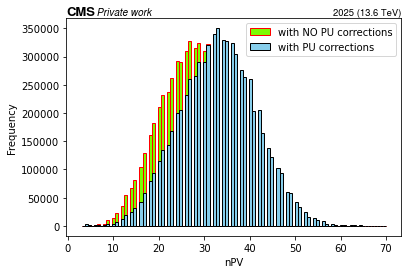

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

# Generate random data for the histogram

# Plotting a basic histogram
plt.hist(MC_dict_0['70_arr']['nPV'], bins=100, color='lawngreen', edgecolor='red', weights = mc_weights_0, label = 'with NO PU corrections')
plt.hist(MC_dict['70_arr']['nPV'], bins=100, color='skyblue', edgecolor='black', weights = mc_weights, label = 'with PU corrections')


# Adding labels and title
plt.xlabel('nPV')
plt.ylabel('Frequency')
# plt.title('Basic Histogram')

hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)

# Display the plot
plt.legend()
plt.show()

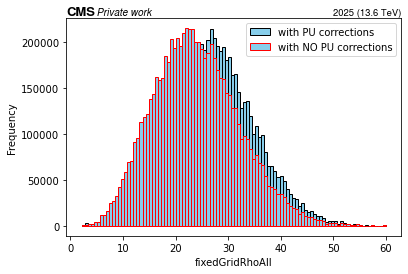

In [18]:
# Plotting a basic histogram
plt.hist(MC_dict['70_arr']['fixedGridRhoAll'], bins=100, color='skyblue', edgecolor='black', weights = mc_weights, label = 'with PU corrections')
plt.hist(MC_dict_0['70_arr']['fixedGridRhoAll'], bins=100, color='skyblue', edgecolor='red', weights = mc_weights_0, label = 'with NO PU corrections')

# Adding labels and title
plt.xlabel('fixedGridRhoAll')
plt.ylabel('Frequency')
# plt.title('Basic Histogram')

hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)

# Display the plot
plt.legend()
plt.show()


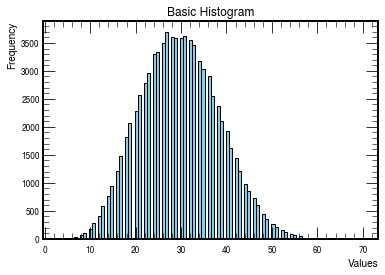

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for the histogram

# Plotting a basic histogram
plt.hist(MC_dict_0['70_arr']['nPV'], bins=100, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

# Display the plot
plt.show()


/tmp/ipykernel_573/569965317.py:14: RuntimeWarning: invalid value encountered in divide
  mc_var_hist /= np.sum(mc_var_hist)


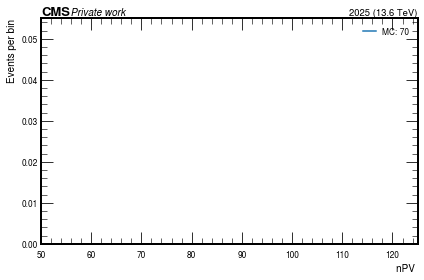

In [11]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'nPV') for mass in masses]

xlabel = 'nPV '

n_bins = 100
hist_range = [0, 200]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")
    # plt.hist((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
# plt.savefig(f"{'plots'}/{'all_mass'}_plot_nonnormalised.pdf")
plt.show()

## R9

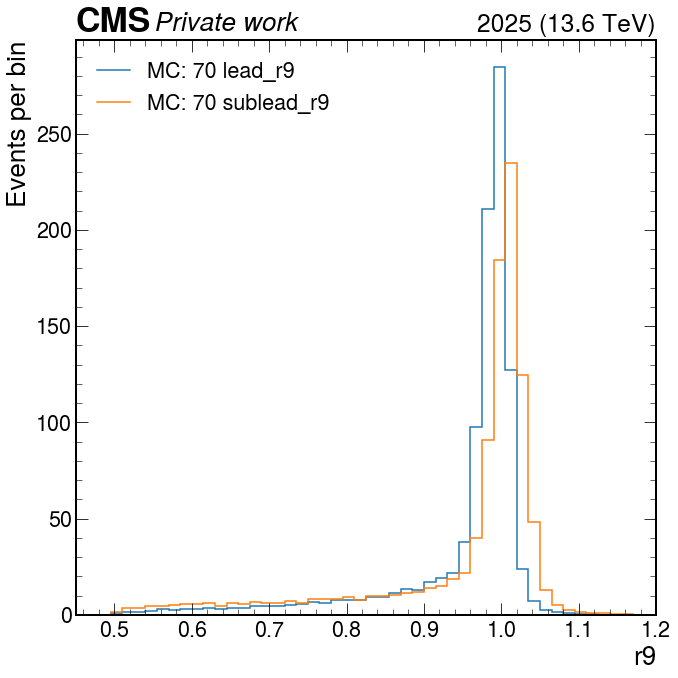

In [24]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'lead_r9') for mass in masses]

xlabel = 'r9'
plot_range = [0.45, 1.2]
n_bins = 50
hist_range = plot_range#[0, 1.5]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]} lead_r9")


mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'sublead_r9') for mass in masses]
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]} sublead_r9")


plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
plt.savefig(f"{'plots'}/{'70'}_r9_nonnormalised.png")
plt.show()

## Rapidity

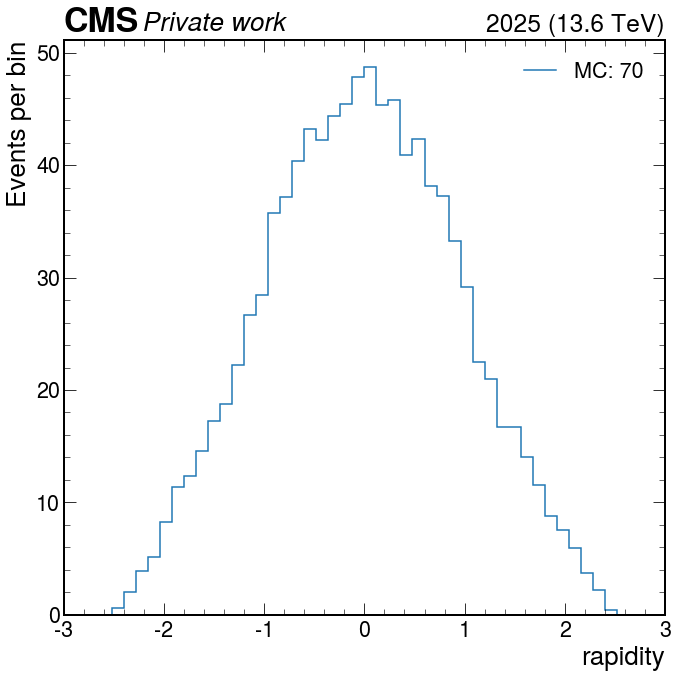

In [27]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'rapidity') for mass in masses]

xlabel = 'rapidity'
plot_range = [-3, 3]
n_bins = 50
hist_range = plot_range#[0, 1.5]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")


plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
plt.savefig(f"{'plots'}/{'70'}_rapidity_nonnormalised.png")
plt.show()

## Pt/m

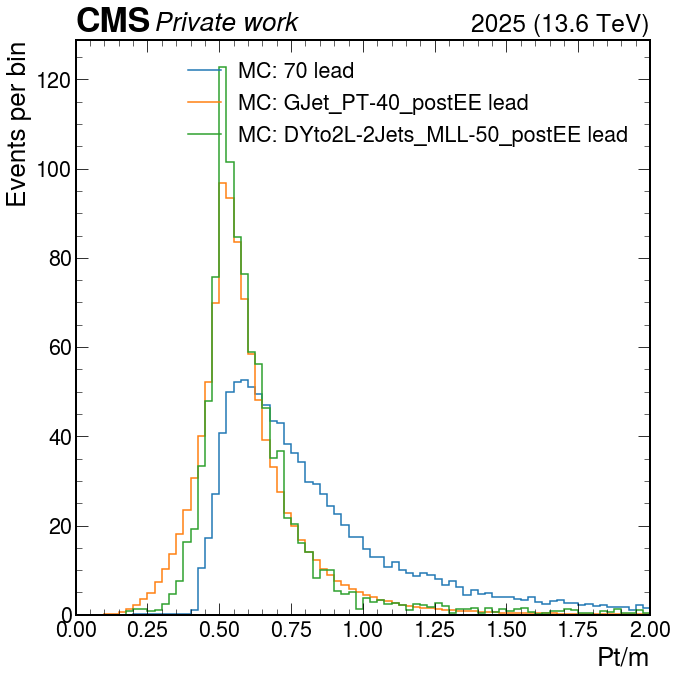

In [11]:
#lead
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'lead_pt')/extract_variable(MC_dict[f'{mass}_arr'], 'mass') for mass in masses]
mc_var_combined_bkg= [extract_variable(MC_bkg_dict[sample], 'lead_pt')/extract_variable(MC_bkg_dict[sample], 'mass') for sample in bkg_samples]
#sublead
# mc_var_combined2= [extract_variable(MC_dict[f'{mass}_arr'], 'sublead_pt')/extract_variable(MC_dict[f'{mass}_arr'], 'mass') for mass in masses]
# mc_var_combined_bkg2= [extract_variable(MC_bkg_dict[sample], 'sublead_pt')/extract_variable(MC_bkg_dict[sample], 'mass') for sample in bkg_samples]

xlabel = 'Pt/m'
plot_range = [0, 2]
n_bins = 80
hist_range = plot_range#[0, 1.5]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]} lead")

    # mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined2[i], binning, weights=mc_weights[i])

    # # Normalize MC histogram
    # mc_var_hist /= np.sum(mc_var_hist)
    # mc_var_hist *= mc_norm

    # # Plot the variable
    # hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]} sublead")

for i in range(len(mc_var_combined_bkg[:])):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined_bkg[i], binning, weights=mc_weights_bkg[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {bkg_samples[i]} lead")


plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.yscale('log')
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
# plt.savefig(f"{'plots'}/{'70'}_pt_m_nonnormalised.png")
plt.show()

In [ ]:
0.33 , 0.25

## lead_electronIdx

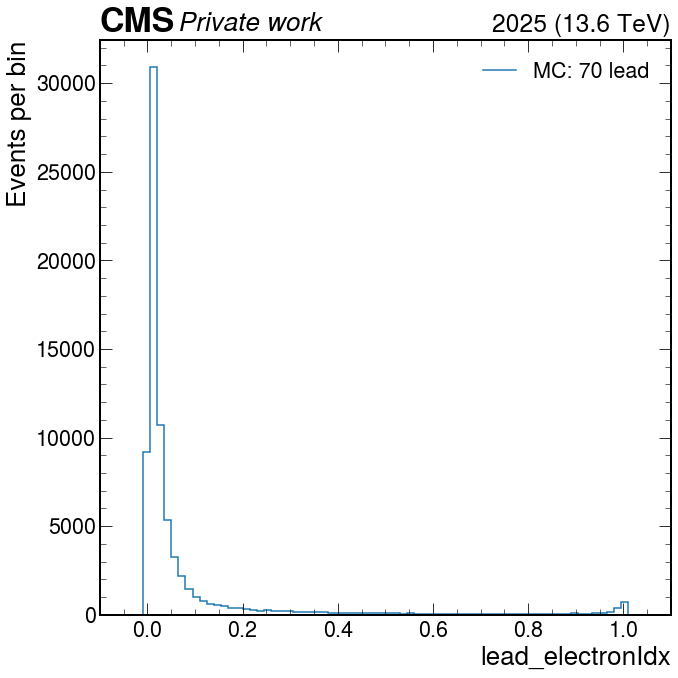

In [135]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'jet1_btagDeepFlavB') for mass in masses]


xlabel = 'lead_electronIdx'
plot_range = [-0.1, 1.1]
n_bins = 80
hist_range = plot_range#[0, 1.5]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning)#, weights=mc_weights[i])

    # Normalize MC histogram
    # mc_var_hist /= np.sum(mc_var_hist)
    # mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]} lead")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.yscale('log')
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
# plt.savefig(f"{'plots'}/{'70'}_pt_m_nonnormalised.png")
plt.show()

## Mass

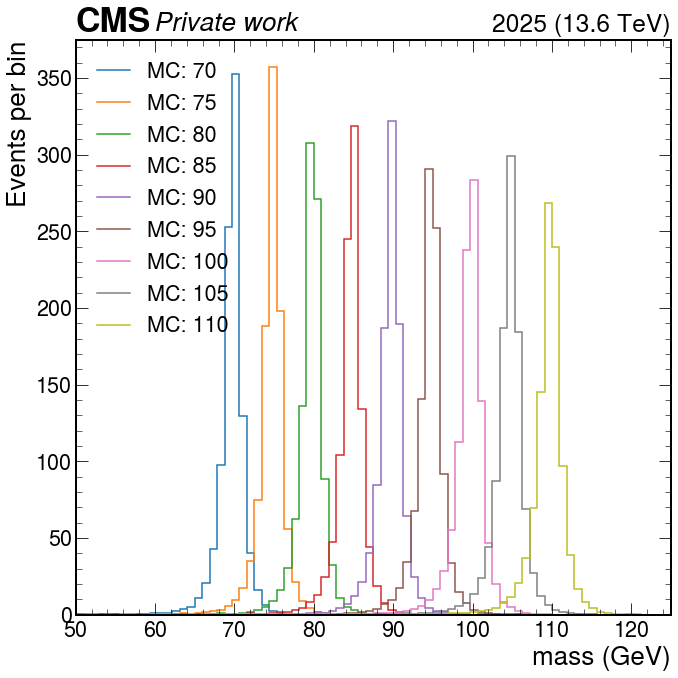

In [8]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'mass') for mass in masses]

xlabel = 'mass (GeV)'

n_bins = 80
hist_range = [50, 125]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")
    # plt.hist((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
# plt.savefig(f"{'plots'}/{'all_mass'}_plot_nonnormalised.pdf")
plt.show()

/tmp/ipykernel_475/2591342320.py:14: RuntimeWarning: invalid value encountered in divide
  mc_var_hist /= np.sum(mc_var_hist)
/tmp/ipykernel_475/2591342320.py:14: RuntimeWarning: invalid value encountered in divide
  mc_var_hist /= np.sum(mc_var_hist)
/tmp/ipykernel_475/2591342320.py:14: RuntimeWarning: invalid value encountered in divide
  mc_var_hist /= np.sum(mc_var_hist)
/tmp/ipykernel_475/2591342320.py:14: RuntimeWarning: invalid value encountered in divide
  mc_var_hist /= np.sum(mc_var_hist)
/tmp/ipykernel_475/2591342320.py:14: RuntimeWarning: invalid value encountered in divide
  mc_var_hist /= np.sum(mc_var_hist)
/tmp/ipykernel_475/2591342320.py:14: RuntimeWarning: invalid value encountered in divide
  mc_var_hist /= np.sum(mc_var_hist)
/tmp/ipykernel_475/2591342320.py:14: RuntimeWarning: invalid value encountered in divide
  mc_var_hist /= np.sum(mc_var_hist)
/tmp/ipykernel_475/2591342320.py:14: RuntimeWarning: invalid value encountered in divide
  mc_var_hist /= np.sum(mc_va

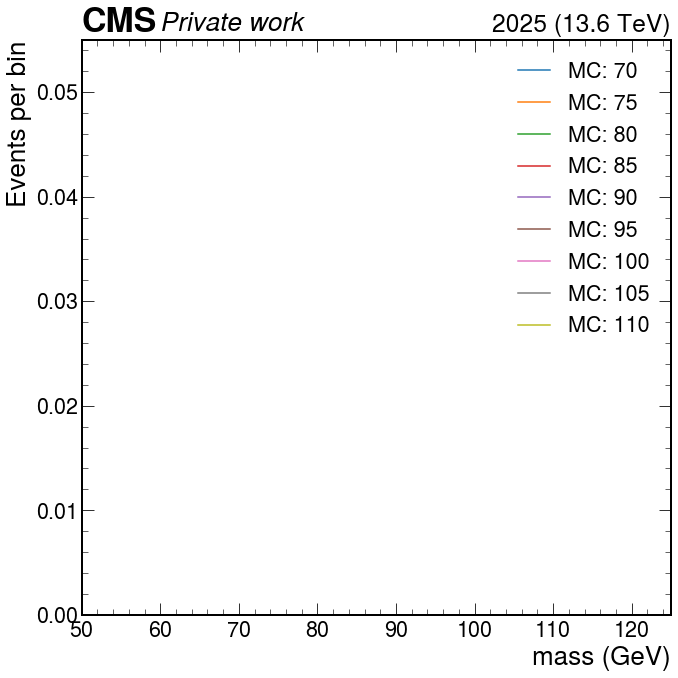

In [17]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'mass') for mass in masses]

xlabel = 'mass (GeV)'

n_bins = 80
hist_range = [50, 125]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")
    # plt.hist((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
# plt.savefig(f"{'plots'}/{'all_mass'}_plot_nonnormalised.pdf")
plt.show()

## Something

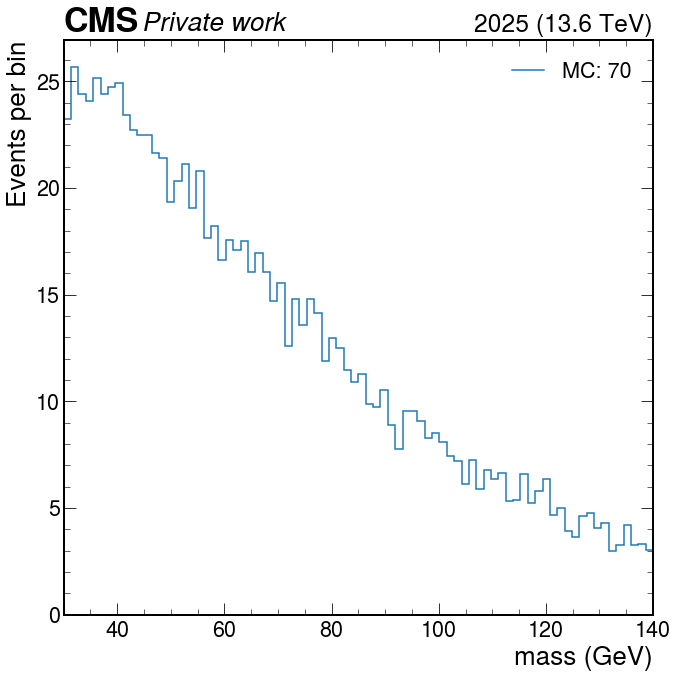

In [14]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'pt') for mass in masses]

xlabel = 'mass (GeV)'
plot_range = [30, 140]
n_bins = 80
hist_range = [30, 140]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")
    # plt.hist((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
plt.show()

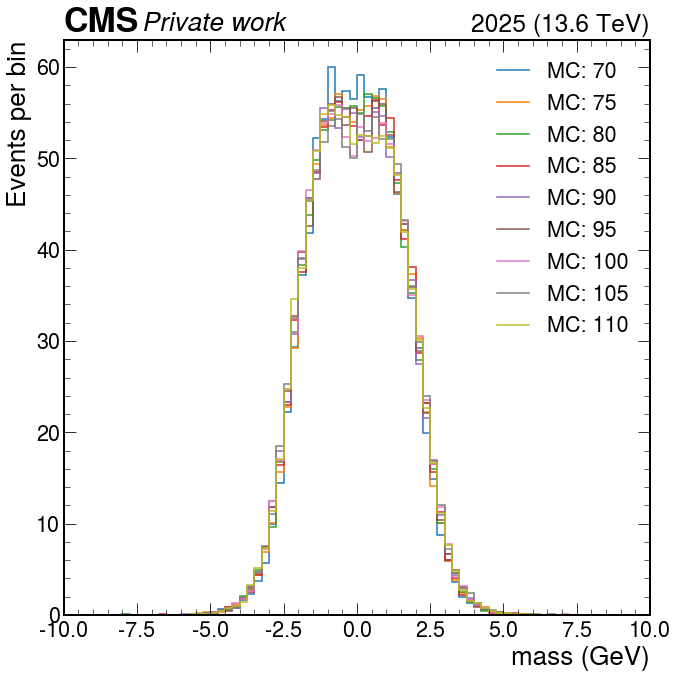

In [26]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'eta') for mass in masses]

xlabel = 'mass (GeV)'
plot_range = [-10, 10]
n_bins = 80
hist_range = [-10, 10]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")
    # plt.hist((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
plt.show()

In [17]:
# MC_dict['70_arr']

<Array [{pt: 71.6, eta: -1.43, ...}, ...] type='83229 * {pt: ?float32, eta:...'>

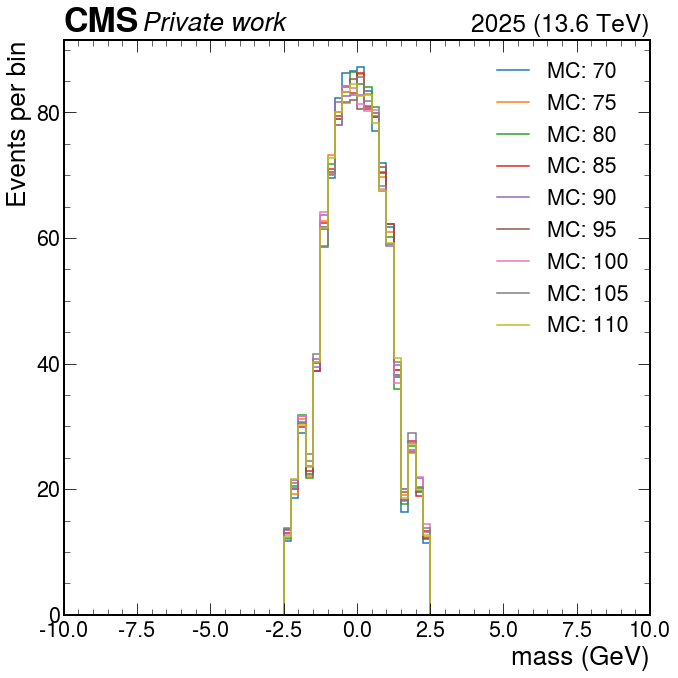

In [28]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'lead_eta') for mass in masses]

xlabel = 'mass (GeV)'
plot_range = [-10, 10]
n_bins = 80
hist_range = [-10, 10]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")
    # plt.hist((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
plt.show()

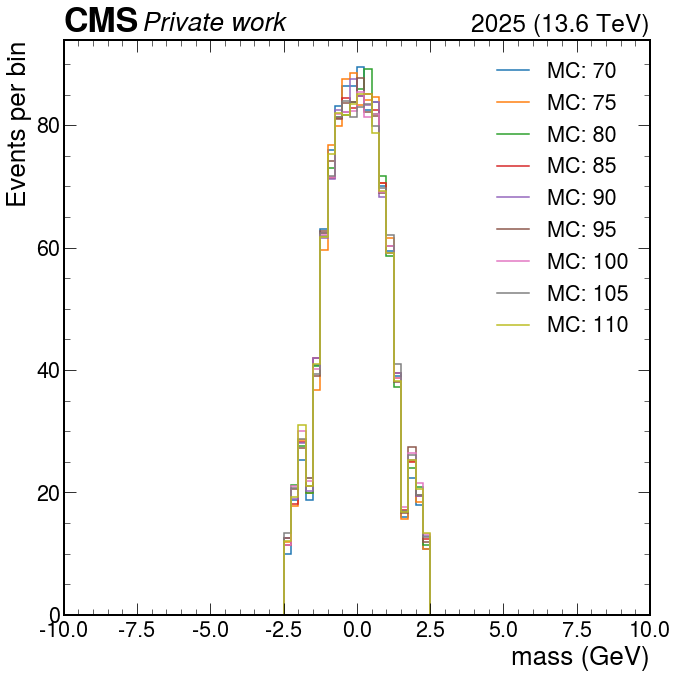

In [29]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'sublead_eta') for mass in masses]

xlabel = 'mass (GeV)'
plot_range = [-10, 10]
n_bins = 80
hist_range = [-10, 10]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")
    # plt.hist((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
plt.show()

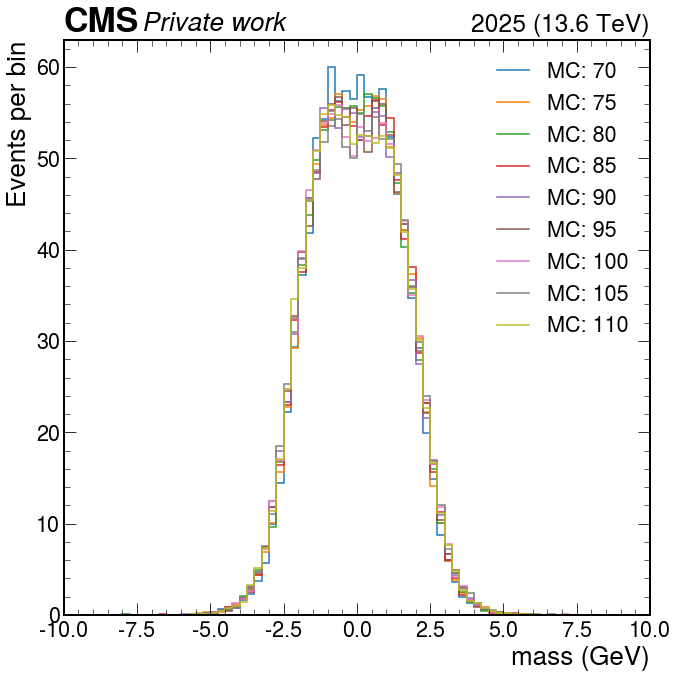

In [19]:
mc_var_combined= [extract_variable(MC_dict[f'{mass}_arr'], 'eta') for mass in masses]

xlabel = 'mass (GeV)'
plot_range = [-10, 10]
n_bins = 80
hist_range = [-10, 10]
binning, width, center = compute_binning(n_bins, hist_range[0], hist_range[1])

plt.style.use(hep.style.CMS)
for i in range(len(mc_var_combined)):
    mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])

    # Normalize MC histogram
    mc_var_hist /= np.sum(mc_var_hist)
    mc_var_hist *= mc_norm

    # Plot the variable
    hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")
    # plt.hist((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.xlim(plot_range)
plt.ylim(bottom=ylim_bottom)
hep.cms.label(cms_label, data=True, year=cms_year, com=cms_com)
plt.tight_layout()
plt.show()

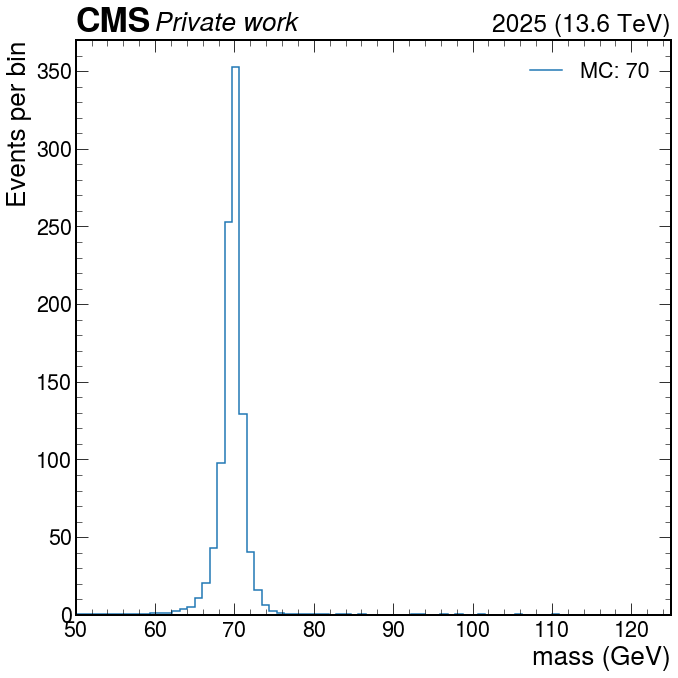

In [17]:

# plt.clf()

In [16]:
plt.plot(mc_var_hist)
plt.show()

NameError: name 'mc_var_hist' is not defined

In [6]:
config_file = "./configs/plot_settings.json"

config = load_config(config_file)
print(f"INFO: Loaded configuration from {config_file}")

INFO: Loaded configuration from ./configs/plot_settings.json


In [7]:
plots_dir = 'plots'

In [17]:
for var_config in config['variables']:
    var_name = var_config['name']
    # Extract the variable for each mass and combine them
    mc_var_combined = [extract_variable(MC_dict[f'{mass}_arr'], var_name) for mass in masses]

    # Compute binning
    binning, width, center = compute_binning(var_config['n_bins'], var_config['hist_range'][0], var_config['hist_range'][1])

    plt.style.use(hep.style.CMS)

    for i in range(len(mc_var_combined)):
        mc_var_hist, mc_var_edges = compute_histogram(mc_var_combined[i], binning, weights=mc_weights[i])
    
        # Normalize MC histogram
        # mc_var_hist /= np.sum(mc_var_hist)
        # mc_var_hist *= var_config['mc_norm']
    
        # Plot the variable
        hep.histplot((mc_var_hist, mc_var_edges), histtype='step', label = f"MC: {masses[i]}")
    
    plt.xlabel(var_config['xlabel'])
    plt.ylabel(var_config['ylabel'])
    if config['plot_settings']['legend']:
        plt.legend()
    plt.xlim(var_config['plot_range'])
    plt.ylim(bottom=config['plot_settings']['ylim_bottom'])
    hep.cms.label(config['plot_settings']['cms_label'], data=True, year=config['plot_settings']['cms_year'], com=config['plot_settings']['cms_com'])
    plt.tight_layout()
    sanitized_var_name = sanitize_filename(var_config['name'])
    # plt.savefig(f"{plots_dir}/{sanitized_var_name}_plot.pdf")
    plt.show()
    plt.clf()

ValueError: weights should have the same shape as a.

## 

In [3]:
def load_data(file_path):
    return ak.from_parquet(file_path)

def load_mc_samples_new(processes, base_path):
    MC_dict = {}
    for process in processes:
        MC_dict[f'{process}_arr'] = load_data(f'{base_path}/vh_M-{process}_preEE')
    return MC_dict

In [4]:
masses = ['60', '90', '95', '105', '110']
input_dir = 'NTuples/merged'

MC_dict = load_mc_samples_new(masses, input_dir)
print(f"INFO: Loaded MC samples for processes: {masses}")

INFO: Loaded MC samples for processes: ['60', '90', '95', '105', '110']


In [5]:
MC_dict['60_arr']

<Array [{lead_seediEtaOriX: 61, ...}, ...] type='4716 * {lead_seediEtaOriX:...'>

In [6]:
MC_dict['60_arr'].GenPTH

<Array [138, 33.5, 94.5, -999, ..., 118, 184, 183, -999] type='4716 * ?float64'>